<a href="https://colab.research.google.com/github/ranadeepbhuyan/ml-class/blob/master/Rana_predictedMask_accuracy_and_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dicom2jpg


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import pydicom as dicom
import cv2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.losses import binary_crossentropy

epsilon = 1e-5
smooth = 1e-6

def tversky(y_true, y_pred):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def focal_tversky(y_true,y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/ResUNet-segModel-weights (3).hdf5', custom_objects={'focal_tversky' : focal_tversky, 'tversky' :  tversky})

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_27 (Conv2D)             (None, 128, 128, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_26 (BatchN  (None, 128, 128, 16  64         ['conv2d_27[0][0]']              
 ormalization)                  )                                                           

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/manifest-1669766397961/metadata.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Series UID            1059 non-null   object
 1   Collection            1059 non-null   object
 2   3rd Party Analysis    1059 non-null   object
 3   Data Description URI  1059 non-null   object
 4   Subject ID            1059 non-null   object
 5   Study UID             1059 non-null   object
 6   Study Description     1059 non-null   object
 7   Study Date            1059 non-null   object
 8   Series Description    1059 non-null   object
 9   Manufacturer          1059 non-null   object
 10  Modality              1059 non-null   object
 11  SOP Class Name        1059 non-null   object
 12  SOP Class UID         1059 non-null   object
 13  Number of Images      1059 non-null   int64 
 14  File Size             1059 non-null   object
 15  File Location         1059 non-null   

In [ ]:
file_location = data['File Location']

In [ ]:
file_location2 = []
for i in file_location:
  testq = i.replace('\\','/')
  update  = testq[1:]
  file_location2.append(update)

In [ ]:
file_location2[0]

'/UPENN-GBM/UPENN-GBM-00001/02-06-2002-NA-BRAINROUTINE-56435/7.000000-t1 axial stealth-post  ProcessedCaPTk-89194'

In [ ]:
img_path1 = r"/content/drive/MyDrive/manifest-1669766397961"
testing_data_path = []
for i in file_location2:
  data_path = img_path1 + i
  testing_data_path.append(data_path)


In [ ]:

testing_data_path[0]

'/content/drive/MyDrive/manifest-1669766397961/UPENN-GBM/UPENN-GBM-00001/02-06-2002-NA-BRAINROUTINE-56435/7.000000-t1 axial stealth-post  ProcessedCaPTk-89194'

In [ ]:
data_path1 = testing_data_path[0] + '/'
index = []
number = []
for i in range(1,193):
  number = f"{i:03d}"
  index = dicom.dcmread(data_path1 + '1-'+str(number)+'.dcm')

In [ ]:
import dicom2jpg
image1 = []
number = []
for i in range(1,192):
  number = f"{i:03d}"
  img = dicom2jpg.dicom2img(data_path1 + '1-'+str(number)+'.dcm')
  image1.append(img)

/usr/local/lib/python3.10/dist-packages/dicom2jpg/utils.py:123: RuntimeWarning: invalid value encountered in true_divide
  pixel_array = ((pixel_array-pixel_array.min())/(pixel_array.max()-pixel_array.min())) * 255.0


In [ ]:
from PIL import Image
import numpy as np
output_path = "/content/drive/MyDrive/training_dataset_nii/output/"
for i in range(len(image1)):
# Convert the array into an image
  image = Image.fromarray(image1[i])
# Specify the output path and save the image
  image_path = os.path.join(output_path, f'{i}.png');
  image.save(image_path)


In [ ]:
data_path23 = os.path.join(output_path, f'{1}.png');

In [ ]:
data_path23

'/content/drive/MyDrive/training_dataset_nii/output/1.png'

In [ ]:
/content/drive/MyDrive/training_dataset_nii/output/1.png

In [ ]:
#fatching ids form data path
def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x
data_ids = [f.path for f in os.scandir(output_path)]
test_ids = pathListIntoIds(data_ids );

In [ ]:
len(test_ids)

164

In [ ]:
test_ids.sort()

In [ ]:
test_ids

In [ ]:
#removing the black images form the dataset
import cv2
final_testing_ids = []
for i in range(0,len(test_ids)):
  data_path23 = os.path.join(output_path, f'{test_ids[i]}')
# Load the image
  image = cv2.imread(data_path23)

# Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the gray level
  gray_level = gray_image.max()

# append the mask_ids into a new list
  if gray_level > 175:
    final_testing_ids.append(i)

In [ ]:
len(final_testing_ids)

142

In [ ]:
final_testing_ids.sort()

In [ ]:
for i in final_testing_ids:
  if i == 78:
    print(i)

78


In [ ]:
def remove_unmatch_ids(dataset1,dataset2):
  for i in dataset1:
    if i not in dataset2:
      dataset1.remove(i)

In [ ]:
remove_unmatch_ids(test_ids,final_testing_ids)


In [ ]:
len(final_testing_ids)

142

In [ ]:
def prediction(final_testing_ids, model):
  # empty list to store results
    mask, image_id = [], []
    output_path = "/content/drive/MyDrive/training_dataset_nii/output/"
    for i in range(0,61):
      X = np.empty((1,128,128,3))
      data_path231 = os.path.join(output_path, f'{final_testing_ids[i]}.png')
      img = cv2.imread(data_path231)
      #resizing and coverting them to array of type float64
      img = cv2.resize(img, (128,128))
      img = np.array(img, dtype = np.float64)
      #Adding image to the empty array
      X[0,] = img
      predict = model.predict(X)
      image_id.append(data_path231)
      mask.append(predict)
    return pd.DataFrame({'image_path': image_id,'predicted_mask': mask})


In [ ]:
data_frame = prediction(final_testing_ids, model)

1/1 [==============================] - 0s 43ms/step


In [ ]:
data_frame.head(1)

,image_path,predicted_mask
0,/content/drive/MyDrive/training_dataset_nii/ou...,"[[[[3.9419265e-06], [7.893591e-06], [8.304873e..."


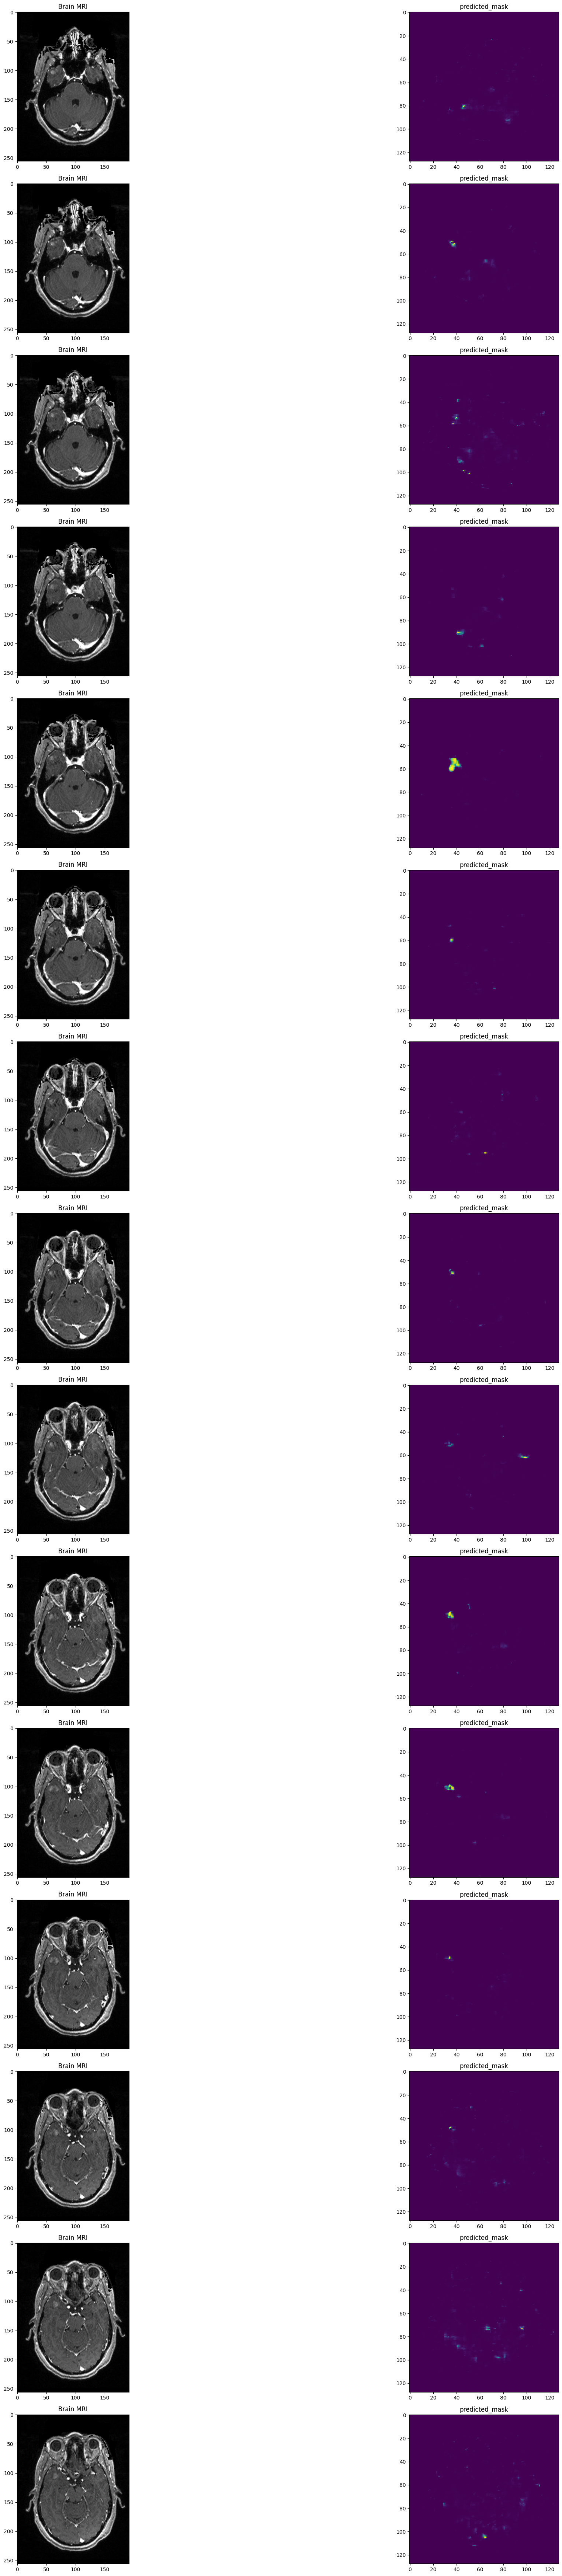

In [ ]:
count = 0
fig, axs = plt.subplots(15,2, figsize=(30,70))
from google.colab.patches import cv2_imshow
for i in range(40,len(data_frame)):
  if count<60:
    image1 = cv2.imread(data_frame['image_path'][i])
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    axs[count][0].imshow(image1)
    axs[count][0].title.set_text('Brain MRI')

    mask1 = data_frame['predicted_mask'][i]
    img1111 = mask1/(mask1.max()/255.0)
    pred1 = np.array(img1111).squeeze().round()
    axs[count][1].imshow(pred1)
    axs[count][1].title.set_text('predicted_mask')

    count +=1
  if (count==15):
    break

fig.tight_layout()
plt.show()
